In [35]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, ttest_rel
from itertools import combinations

NUM_PARTICIPANTS = 24

In [13]:
##########################################################################################
def get_form_data():
    
    my_file_dir = 'c:\\Users\\micha\\OneDrive\\My_GitHub_Repos\\robot-x-ar\\study1\\data\\questionnaire\\after_task_form_cleaned.csv'
    big_df = read_csv(my_file_dir)
    num_cols = big_df.shape[1]
    df = big_df.iloc[2:, 17:num_cols]
    # df = df.fillna(1)
    # df.drop(1, axis="index", inplace=True)
    # df.reset_index(drop=True, inplace=True)
    
    print("\n Finished reading raw csv file! \n")
    
    return df

In [15]:
form_df = get_form_data()
form_df.head()


 Finished reading raw csv file! 



,Q1,Q2,Q3,Q4,Q5_1,Q5_2,Q5_3,Q5_4,Q6
2,1,Yes. It helps to project the interaction of my...,Human arm in robot orientation felt better bec...,The human arm was better,4,2,1,3,NaN
3,2,"Yes, because it can give me a preview of which...",It’s better with my own arm,Virtual human arm,3,1,2,4,The hologram of the robot arm make me think mo...
4,3,No. I still focus on the movement of the real ...,Yes,Robot arm. Human arm is horrible.,1,2,3,4,NaN
5,4,Yes,No,No,1,2,3,4,NaN
6,5,It’s very helpful especially the vertical huma...,It was a lot more helpful with the virtual arm...,Virtual human arm,4,2,1,3,The vertical human arm makes me feel like I’m ...


#### Plotting of distribution of preferences for each type of visualization

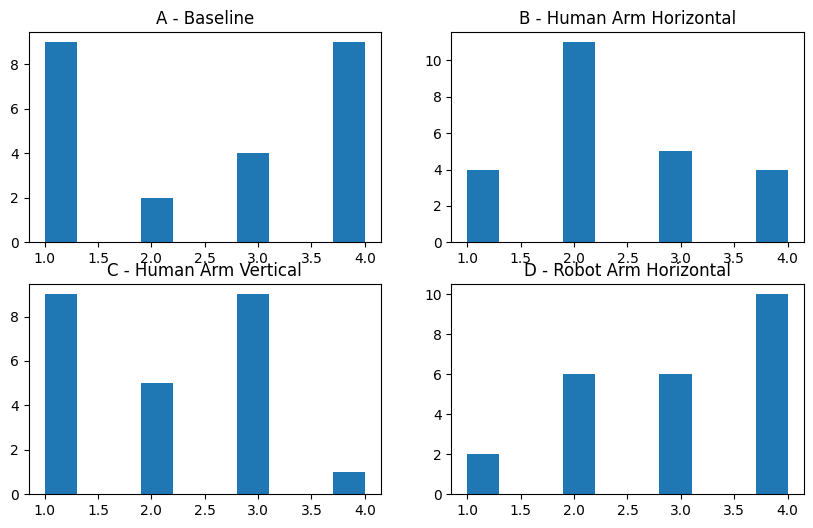

In [24]:
A_pref_lst = form_df['Q5_1'].apply(lambda x: int(x)).tolist()
B_pref_lst = form_df['Q5_2'].apply(lambda x: int(x)).tolist()
C_pref_lst = form_df['Q5_3'].apply(lambda x: int(x)).tolist()
D_pref_lst = form_df['Q5_4'].apply(lambda x: int(x)).tolist()

# plot the distribution of preferences for each visualization
plt.rcParams["figure.figsize"] = (10, 6)

plt.subplot(2, 2, 1)
plt.hist(A_pref_lst)
plt.title("A - Baseline")

plt.subplot(2, 2, 2)
plt.hist(B_pref_lst)
plt.title("B - Human Arm Horizontal")

plt.subplot(2, 2, 3)
plt.hist(C_pref_lst)
plt.title("C - Human Arm Vertical")

plt.subplot(2, 2, 4)
plt.hist(D_pref_lst)
plt.title("D - Robot Arm Horizontal")

plt.show()

#### Average ranking for each type of visualization

In [26]:
A_ave_rank = sum(A_pref_lst) / len(A_pref_lst)
B_ave_rank = sum(B_pref_lst) / len(B_pref_lst)
C_ave_rank = sum(C_pref_lst) / len(C_pref_lst)
D_ave_rank = sum(D_pref_lst) / len(D_pref_lst)

print("Averaged ranks for (A, B, C, D) = (%.2f, %.2f, %.2f, %.2f)" % (A_ave_rank, B_ave_rank, C_ave_rank, D_ave_rank))

Averaged ranks for (A, B, C, D) = (2.54, 2.38, 2.08, 3.00)


#### Distribution of visualizations for each preference

In [44]:
A_top_count = A_pref_lst.count(1)
B_top_count = B_pref_lst.count(1)
C_top_count = C_pref_lst.count(1)
D_top_count = D_pref_lst.count(1)
print("Frequencies of rank 1 = (%d, %d, %d, %d)" % (A_top_count, B_top_count, C_top_count, D_top_count))

A_top_count = A_pref_lst.count(2)
B_top_count = B_pref_lst.count(2)
C_top_count = C_pref_lst.count(2)
D_top_count = D_pref_lst.count(2)
print("Frequencies of rank 2 = (%d, %d, %d, %d)" % (A_top_count, B_top_count, C_top_count, D_top_count))

A_top_count = A_pref_lst.count(3)
B_top_count = B_pref_lst.count(3)
C_top_count = C_pref_lst.count(3)
D_top_count = D_pref_lst.count(3)
print("Frequencies of rank 3 = (%d, %d, %d, %d)" % (A_top_count, B_top_count, C_top_count, D_top_count))

A_top_count = A_pref_lst.count(4)
B_top_count = B_pref_lst.count(4)
C_top_count = C_pref_lst.count(4)
D_top_count = D_pref_lst.count(4)
print("Frequencies of rank 4 = (%d, %d, %d, %d)" % (A_top_count, B_top_count, C_top_count, D_top_count))

Frequencies of rank 1 = (9, 4, 9, 2)
Frequencies of rank 2 = (2, 11, 5, 6)
Frequencies of rank 3 = (4, 5, 9, 6)
Frequencies of rank 4 = (9, 4, 1, 10)


#### ANOVA Test

In [28]:
f_oneway(A_pref_lst, B_pref_lst, C_pref_lst, D_pref_lst)

F_onewayResult(statistic=2.966235085046966, pvalue=0.036078158961685716)

#### Paired t-test between all pairs of rankings

In [40]:
prefs = [A_pref_lst, B_pref_lst, C_pref_lst, D_pref_lst]
prefs_idx = [0, 1, 2, 3]
pref_pairs = list(combinations(prefs_idx, 2))
print(pref_pairs)
for pair in pref_pairs:
    res = ttest_rel(prefs[pair[0]], prefs[pair[1]])
    print(res)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
TtestResult(statistic=0.4289522117905444, pvalue=0.6719490765460852, df=23)
TtestResult(statistic=1.0992833097295414, pvalue=0.2830184086999493, df=23)
TtestResult(statistic=-1.0880034903739644, pvalue=0.2878637328228618, df=23)
TtestResult(statistic=0.9416492888346827, pvalue=0.356158355703735, df=23)
TtestResult(statistic=-1.9016708972001073, pvalue=0.06981316432874962, df=23)
TtestResult(statistic=-3.113978823225723, pvalue=0.0048830352941703755, df=23)


#### Export ranking to new data file 

In [33]:
pid_lst = [i for i in range(1, 25)]+[i for i in range(1, 25)]+[i for i in range(1, 25)]+[i for i in range(1, 25)]
cond_lst = ["A" for i in range(24)] + ["B" for i in range(24)] + ["C" for i in range(24)] + ["D" for i in range(24)]
rank_lst = A_pref_lst + B_pref_lst + C_pref_lst + D_pref_lst

# generate new dataframe
df_dict = {
    'pid': pid_lst,
    'condition': cond_lst,
    'ranking': rank_lst
}
cleaned_df = DataFrame(df_dict)

# write new dataframe to csv file
dest_path = 'c:\\Users\\micha\\OneDrive\\My_GitHub_Repos\\robot-x-ar\\study1\\data\\questionnaire\\vis_ranking.csv'
cleaned_df.to_csv(dest_path, index=False)

print(" Successfully written pre-processed data to csv file! \n")

 Successfully written pre-processed data to csv file! 

